## Análise de otimização das despesas com marketing

#### Você se saiu muito bem no curso,  e recebeu uma oferta de estágio no departamento analítico da empresa Y.Afisha. Sua primeira tarefa é ajudar a empresa a otimizar suas despesas com marketing.

#### Passo 1. Carregue os dados e prepare-os para a análise

Armazene os dados sobre os acessos, pedidos e despesas em variáveis. Otimize os dados para a análise. Certifique-se de que cada coluna contém o tipo correto de dados.

In [28]:
# importando as bibliotecas:

import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
# carregando os arquivos csv com os tipos já ajustados, comentários ao lado de cada variável com o tamanho original:

visit_log = pd.read_csv('/datasets/visits_log_us.csv', 
    parse_dates = ['End Ts', 'Start Ts']) # tamanho original 79.3MB

orders_log = pd.read_csv('/datasets/orders_log_us.csv',
    parse_dates = ['Buy Ts']) # tamanho original 4.4MB

costs_df = pd.read_csv('/datasets/costs_us.csv',
    parse_dates = ['dt']) # tamanho original 206.2KB

In [30]:
# Verificando os arquivos: 

visit_log.info(memory_usage = 'deep') # reduzido para 32.7MB (79.3MB)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 32.7 MB


In [31]:
orders_log.info(memory_usage = 'deep') # reduziu o tamanho do arquivo para 1.2 MB (4.4MB)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [32]:
costs_df.info(memory_usage = 'deep') # reduzido para 59.7 KB (206.2 KB)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [33]:
print(visit_log.head())

    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [34]:
print(orders_log.head())

               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450


In [35]:
print(costs_df.head())

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


##### Resposta do Aluno: 
Arquivos carregados e convertidos. a princípio sem nenhum dado faltante.

#### Analisar (Macro):

Como as pessoas usam o produto, Quando elas começam a comprar, Quanto dinheiro cada cliente traz para a empresa, Quando as despesas serão cobertas

##### Produto
 
- Quantas pessoas usam-no cada dia, semana e mês?
- Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
- Que comprimento tem cada sessão?
- Com que frequência os usuários voltam?

#### Resposta do Aluno:
Para Resolver essas questões, será necessário realizar coortes comportamentais;
- 1º) Para descobrir a quantidade de usuários em cada dia, semana e mês, iremos trabalhar com a tabela 'visits' e 'orders'


In [36]:
# juntando os dataframes com join:
df_visits = visit_log.merge(orders_log, on='Uid')
print(df_visits.head())


    Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   

                    Uid              Buy Ts  Revenue  
0  16174680259334210214 2018-03-09 20:25:00     2.33  
1  16174680259334210214 2018-03-09 20:25:00     2.33  
2  16007536194108375387 2017-09-04 12:46:00     2.44  
3  16007536194108375387 2017-10-28 00:01:00     1.53  
4  16007536194108375387 2017-10-28 19:16:00     1.53  


In [37]:
# Separando por mês, semana e dia, convertendo e criando colunas respectivas;
# Conversão:
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'], format="%Y-%M-%d %H:%M")

# Month:
df_visits['start_month'] = df_visits['Start Ts'].dt.month

# Week:
df_visits['start_week'] = df_visits['Start Ts'].dt.week

# Date:
df_visits['start_date'] = df_visits['Start Ts'].dt.date

In [38]:
# Descobrindo quantos usuários entram no app por: (DAU, MAU, WAU)

#usuários por date:
d_total = df_visits.groupby('start_date').agg({'Uid': ['count', 'nunique']})

#usuários por week:
w_total = df_visits.groupby('start_week').agg({'Uid': ['count', 'nunique']})

#usuários por month:
m_total = df_visits.groupby('start_month').agg({'Uid': ['count', 'nunique']})

print(d_total.head()) # Quantidade de acessos de cada usuário por dia!
print(w_total.head()) # Quantidade de acessos de cada usuário por semana!
print(m_total) # Quantidade de acessos de cada usuário por mês!

             Uid        
           count nunique
start_date              
2017-06-01  1739     170
2017-06-02  1230     177
2017-06-03   528     109
2017-06-04   767     118
2017-06-05  1764     267
              Uid        
            count nunique
start_week               
1           14281    1310
2           15688    1422
3           18730    1453
4           18976    1590
5           21340    1868
                Uid        
              count nunique
start_month                
1             77651    5504
2             82787    5687
3             75988    5458
4             60157    3857
5             70114    4328
6             25988    2923
7             28986    2893
8             32564    2282
9             60757    3960
10            71483    6251
11            72420    6471
12           102912    6629


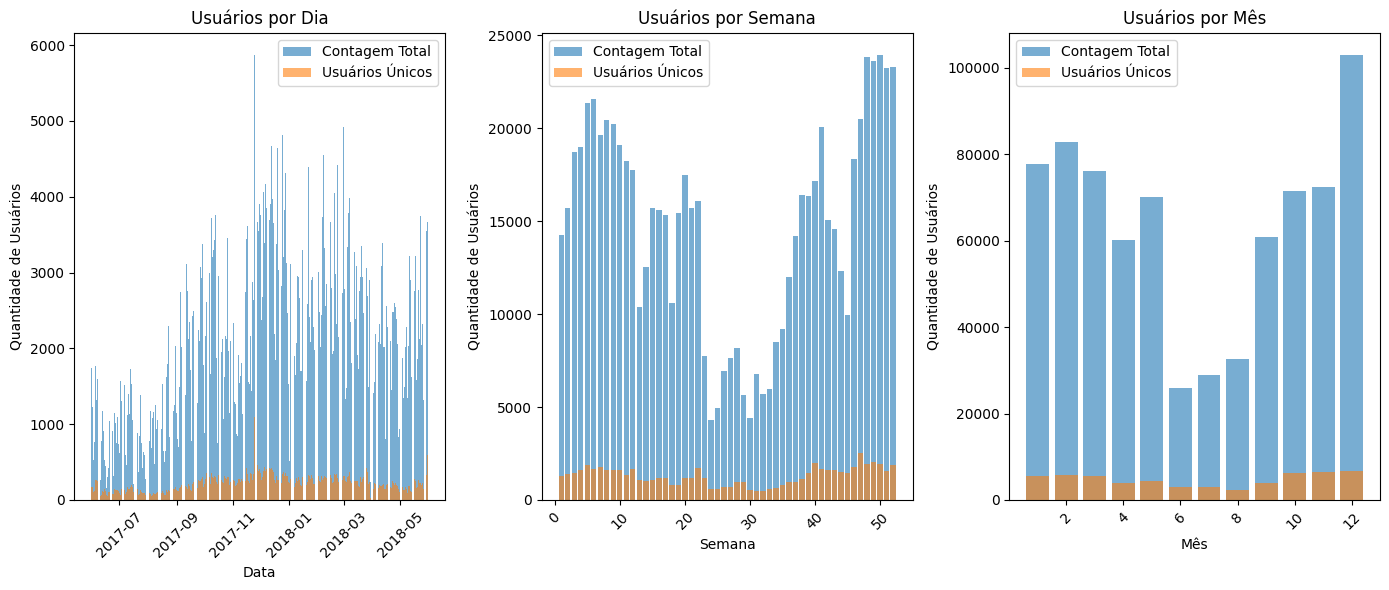

In [39]:
# Graficos:
plt.figure(figsize=(14, 6))

# DAU
plt.subplot(1, 3, 1)
plt.bar(d_total.index, d_total[('Uid', 'count')], alpha=0.6, label='Contagem Total')
plt.bar(d_total.index, d_total[('Uid', 'nunique')], alpha=0.6, label='Usuários Únicos')
plt.title('Usuários por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=45)
plt.legend()

# Gráfico WAU
plt.subplot(1, 3, 2)
plt.bar(w_total.index, w_total[('Uid', 'count')], alpha=0.6, label='Contagem Total')
plt.bar(w_total.index, w_total[('Uid', 'nunique')], alpha=0.6, label='Usuários Únicos')
plt.title('Usuários por Semana')
plt.xlabel('Semana')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=45)
plt.legend()

# Gráfico MAU
plt.subplot(1, 3, 3)
plt.bar(m_total.index, m_total[('Uid', 'count')], alpha=0.6, label='Contagem Total')
plt.bar(m_total.index, m_total[('Uid', 'nunique')], alpha=0.6, label='Usuários Únicos')
plt.title('Usuários por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### Resposta do Aluno:
Acima a quantidade de usuários por data, semana e mês

#### Resposta do Aluno: Como o número de visitas é muito maior que o número de usúários únicos, deduzimos que o mesmo usuário entra mais de uma vez por dia.

In [40]:
# Descobrindo a duração de cada sessão (por usuário):

#Conversão:
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'], format="%Y-%M-%d %H:%M")

df_visits['session_duration_sec'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.seconds
print(df_visits.head(3))
print()
print(df_visits['session_duration_sec'].mean()) # média de duração por sessão(em segundos)

    Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   

                    Uid              Buy Ts  Revenue  start_month  start_week  \
0  16174680259334210214 2018-03-09 20:25:00     2.33            5          20   
1  16174680259334210214 2018-03-09 20:25:00     2.33            3          10   
2  16007536194108375387 2017-09-04 12:46:00     2.44            9          35   

   start_date  session_duration_sec  
0  2018-05-20                  1440  
1  2018-03-09                  1680  
2  2017-09-03                    60  

1260.1617680068573


In [41]:
# Descobrindo a frequência que os usuários acessam o app (TR):


user_f = df_visits.groupby(['start_week', 'start_month']).agg({'Uid':['count', 'nunique']})

user_f.columns = ['n_sessions', 'n_users']
user_f['user_f'] = (user_f['n_sessions'] / user_f['n_users'])
print(user_f)

                        n_sessions  n_users     user_f
start_week start_month                                
1          1                 14281     1310  10.901527
2          1                 15688     1422  11.032349
3          1                 18730     1453  12.890571
4          1                 18976     1590  11.934591
5          1                  9976      917  10.878953
...                            ...      ...        ...
48         12                 8810      819  10.757021
49         12                23635     2034  11.619961
50         12                23936     1941  12.331788
51         12                23239     1552  14.973582
52         12                23292     1897  12.278334

[62 rows x 3 columns]


#### Resposta do aluno: Um usuário acessa mais de 10x o app por semana.

#### Vendas
 
Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)
- Quantos pedidos os clientes fazem durante um determinado período de tempo?
- Qual é o volume médio de uma compra?
- Quanto dinheiro eles trazem para a empresa (LTV)?

In [42]:
# Verificando o período de tempo em que os clientes começam a comprar:

# Conversão:
df_visits['Buy Ts'] = pd.to_datetime(df_visits['Buy Ts'], format="%Y-%M-%d %H:%M")
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'], format="%Y-%M-%d %H:%M")

# Verificando a data da primeira compra de cada usuário:
first_buy = df_visits.groupby(['Uid'])['Buy Ts'].min() # data da primeira compra de cada usuário.
first_buy.name = 'first_buy'
df_visits = df_visits = df_visits.join(first_buy, on='Uid')

first_access = df_visits.groupby(['Uid'])['Start Ts'].min() # data do primeiro acesso.
first_access.name = 'first_access'
df_visits = df_visits = df_visits.join(first_access, on= 'Uid')

print(df_visits.head()) 

    Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   

                    Uid              Buy Ts  Revenue  start_month  start_week  \
0  16174680259334210214 2018-03-09 20:25:00     2.33            5          20   
1  16174680259334210214 2018-03-09 20:25:00     2.33            3          10   
2  16007536194108375387 2017-09-04 12:46:00     2.44            9          35   
3  16007536194108375387 2017-10-28 00:01:00     1.53            9          35   
4  16007536194108375387 2017-10-28 19:16:00     1.53            9          35   

   start_date  session_duration_sec           first_buy        first_access  
0  2018-05-20                  1440 2018-03-

In [43]:
df_visits['time_to_event'] = df_visits['first_buy'] - df_visits['first_access'] # coluna 'time_to_event' com o tempo que cada usuário leva para realizar a primeira compra!
print(df_visits.head())

    Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   

                    Uid              Buy Ts  Revenue  start_month  start_week  \
0  16174680259334210214 2018-03-09 20:25:00     2.33            5          20   
1  16174680259334210214 2018-03-09 20:25:00     2.33            3          10   
2  16007536194108375387 2017-09-04 12:46:00     2.44            9          35   
3  16007536194108375387 2017-10-28 00:01:00     1.53            9          35   
4  16007536194108375387 2017-10-28 19:16:00     1.53            9          35   

   start_date  session_duration_sec           first_buy        first_access  \
0  2018-05-20                  1440 2018-03

In [44]:
df_visits['time_to_event'].describe() 

count                        761807
mean     17 days 15:37:02.129909544
std      42 days 08:51:00.569695410
min                 0 days 00:00:00
25%                 0 days 00:17:00
50%                 1 days 23:49:00
75%                 8 days 21:07:00
max               363 days 07:04:00
Name: time_to_event, dtype: object

#### Resposta do aluno:
A média de tempo que os clientes levam para realizar a compra a partir do primeiro acesso é 17 dias e 15 horas, 25% dos clientes compram em menos de 17 minutos após o primeiro acesso, 50% levam quase dois dias para realizar a compra, e 75% demoram mais de 8 dias, e existe clientes que demoraram quase  1 ano para comprar...

<AxesSubplot:title={'center':'Prazo da primeira compra'}, xlabel='Tempo decorrido (em dias e horas)', ylabel='Número de Clientes'>

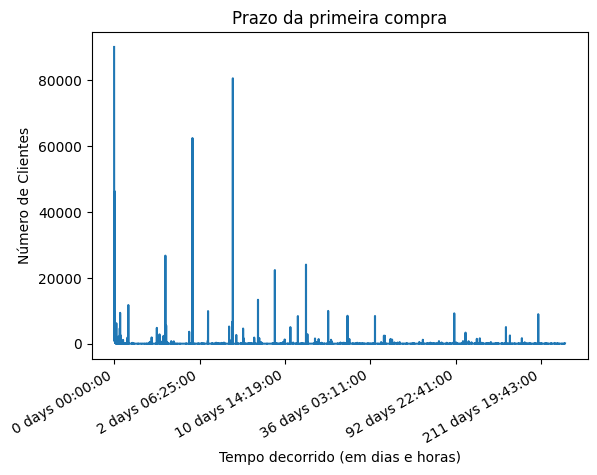

In [45]:
df_visits.groupby('time_to_event')['Uid'].count().plot(title='Prazo da primeira compra', xlabel= 'Tempo decorrido (em dias e horas)', ylabel='Número de Clientes')

In [46]:
# Volume médio de compras por usuário:
orders = df_visits.groupby('Uid')['Revenue'].sum().sort_values(ascending=False) # Total por Cliente (Ano)
print(orders.head(10)) # 10 maiores clientes no ano
print()
print(df_visits['Revenue'].mean()) # Valor médio por pedido único.
print(df_visits['Revenue'].max()) # Valor máximo do pedido único
print(df_visits['Revenue'].min())

Uid
5539673724080479777     980244.94
3263486045884611639     622650.60
3644482766749211722     361072.50
11920452646463905188    308885.50
6853820180456171909     263677.65
9737640335185488211     256899.16
6268225112727843212     230505.68
13888745432979765063    226293.80
6731421022966725351     211799.28
17999372575896145244    193974.34
Name: Revenue, dtype: float64

9.139069803769194
2633.28
0.0


<AxesSubplot:title={'center':'Média de valores dos pedidos'}, xlabel='Valor do pedido USD', ylabel='Número de Clientes'>

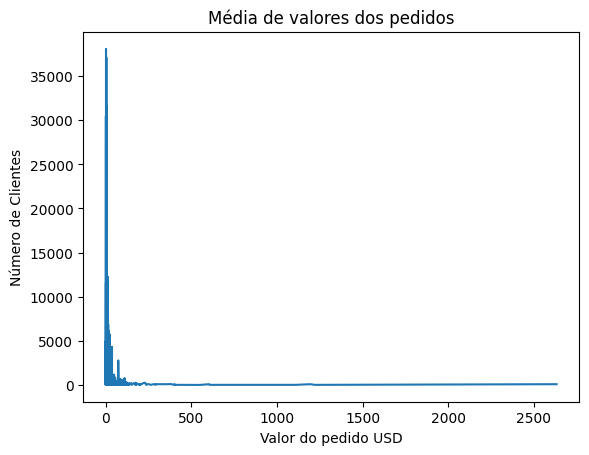

In [47]:
# Volume médio de pedido unitário:
df_visits.groupby('Revenue')['Uid'].count().plot(title= 'Média de valores dos pedidos', xlabel = "Valor do pedido USD", ylabel= "Número de Clientes")

Text(0, 0.5, 'Número de Usuários')

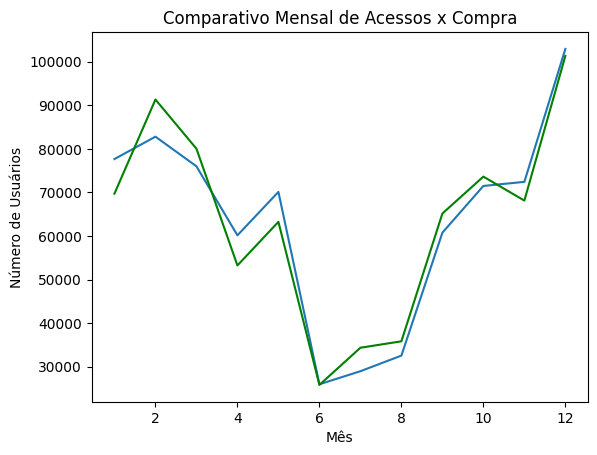

In [48]:
# Comparativo acesso x compra mensal :
# Month:
df_visits['buy_month'] = df_visits['Buy Ts'].dt.month

visit_month = df_visits.groupby(['start_month'])['Uid'].count().plot()
b_month = df_visits.groupby(['buy_month'])['Uid'].count().plot(color='green')
plt.title('Comparativo Mensal de Acessos x Compra')
plt.xlabel('Mês')
plt.ylabel("Número de Usuários")

#### Resposta do Aluno:
É possível notar uma sazonalidade, tivemos uma queda nos acessos e conseguentemente nas vendas.. um ponto a ser analisado eventualmente para descobrir o motivo. contudo o consumo voltou a crescer, outro ponto importante a ser analisado, talvez um usuário possa realizar mais de um pedido por acesso, visto que existem alguns pontos onde o número de pedidos, ultrapassa a quantidade de acessos (sendo que deveria ser 'naturalmente' o contrário.) 

In [49]:
# Descobrindo quanto dinheiro eles trazem para empresa: Verificando o tempo de vida de um cliente (LTV) e tx de retenção

# verificando mês da primeira compra;

df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'])
df_visits['Buy Ts'] = pd.to_datetime(df_visits['Buy Ts'])

# Cohort 1º mês:
df_visits['first_orders_month'] = df_visits.groupby('Uid')['Start Ts'].transform('min').dt.to_period('M')

In [50]:
#Verificando a quantidade de clientes para cada mês:

df_visits['activity_month'] = df_visits['Start Ts'].dt.to_period('M')
df_visits['age'] = (df_visits['activity_month'] - df_visits['first_orders_month']).apply(lambda x: x.n)

In [51]:
# Calcular o LTV
# Agrupar por coorte e idade, calculando as métricas necessárias
report = df_visits.groupby(['first_orders_month', 'age']).agg(
    gp=('Revenue', 'sum'),   # gross profit
    Uid=('Uid', 'nunique')  
).reset_index()

report['ltv'] = report['gp'] / report['Uid']
report

,first_orders_month,age,gp,Uid,ltv
0,2017-06,0,253324.55,2923,86.665943
1,2017-06,1,190867.58,435,438.776046
2,2017-06,2,184169.16,309,596.016699
3,2017-06,3,340679.26,366,930.817650
4,2017-06,4,410873.97,455,903.019714
...,...,...,...,...,...
73,2018-03,1,45685.01,279,163.745556
74,2018-03,2,69189.45,164,421.886890
75,2018-04,0,41163.35,1890,21.779550
76,2018-04,1,35703.27,210,170.015571


In [52]:
# Cálculo LtV: e criação de colunas df com lucro bruto e tempo de cliente:
output = report.pivot_table(
    index='first_orders_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean'
).round()

# Substituir NaNs por 0 (se usar  o '' (vazio) deu erro no mapa de calor abaixo)
output = output.fillna(0)
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06,87.0,439.0,596.0,931.0,903.0,982.0,1316.0,1016.0,980.0,1060.0,1016.0,905.0
2017-07,13.0,46.0,66.0,60.0,60.0,54.0,40.0,27.0,38.0,112.0,59.0,0.0
2017-08,19.0,202.0,158.0,294.0,245.0,186.0,195.0,384.0,663.0,834.0,0.0,0.0
2017-09,90.0,119.0,274.0,1116.0,272.0,664.0,282.0,347.0,64.0,0.0,0.0,0.0
2017-10,13.0,42.0,25.0,34.0,39.0,28.0,35.0,94.0,0.0,0.0,0.0,0.0
2017-11,12.0,66.0,90.0,135.0,88.0,41.0,39.0,0.0,0.0,0.0,0.0,0.0
2017-12,15.0,92.0,75.0,236.0,53.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01,10.0,122.0,92.0,87.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02,12.0,58.0,47.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


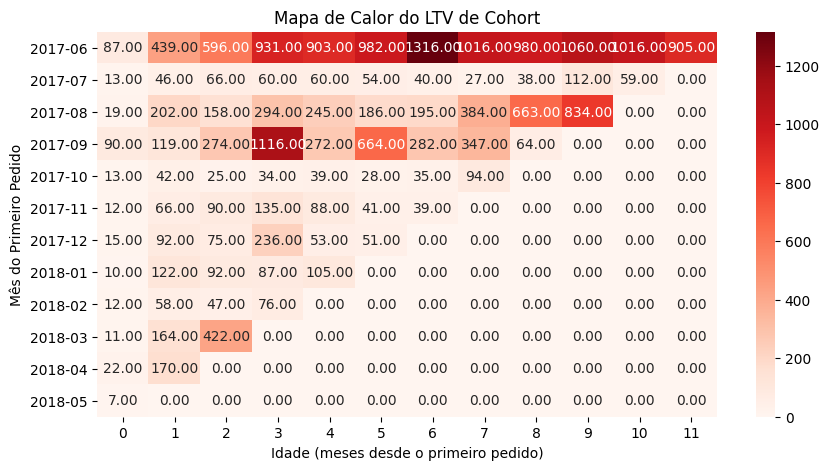

In [54]:
# Mapa  de Calor:
plt.figure(figsize=(10, 5))
sns.heatmap(output, annot=True, fmt='.2f', cmap='Reds')
plt.title('Mapa de Calor do LTV de Cohort')
plt.xlabel('Idade (meses desde o primeiro pedido)')
plt.ylabel('Mês do Primeiro Pedido')
plt.show()

In [ ]:
# Descobrindo o ltv do primeiro corte:
ltv_201706 = output.loc['2017-06'].sum()
print(ltv_201706)

In [ ]:
# Grafico de LTV:
plt.figure(figsize=(12, 6))
sns.boxplot(data=report_, x='age', y='ltv')
plt.title('Distribuição do LTV por Age')
plt.xlabel('Age')
plt.ylabel('LTV')
plt.tight_layout()
plt.show()

#### Resposta do Aluno:
Foi calculado o Lifetime Value (valor do tempo de vida) de cada cliente para ter uma ideia de quanto retorno trazem a empresa.
O cálculo é feito dividindo o lucro bruto, pelo número de compradores, para obter o LTV por cliente, foi calculado o LTV médio para diferentes coortes ao longo do tempo, foi organizado em uma tabela de coorte, e depois somado o LTV acumulado dentro de um período.

#### Marketing
 
- Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
- Quanto custou a aquisição de clientes para cada origem?
- Os investimentos valeram a pena? (ROI)

Construa gráficos para ver como essas métricas diferem para vários dispositivos e diferentes origens de anúncios e como elas mudam com o tempo. 

Passo 3. Escreva uma conclusão: recomende aos especialistas de marketing quanto dinheiro e onde seria melhor investir.

Quais origens/plataformas você recomendaria? Fundamente sua escolha: em quais métricas você se concentrou? Por quê? Que conclusões você tirou ao encontrar os valores das métricas?

In [ ]:
# Descobrindo quanto dinheito foi gasto em Marketing:
# Verificando o CAC:

cohort_201706 = report[report['first_orders_month'] == '2017-06-01']
costs_201706 = costs_df[costs_df['dt'] == '2017-06-01']['costs'].sum()
print(cohort_201706)
print(report.head())

In [ ]:
# Descobrindo o CAC
n_buyers_201706 = report['Uid'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706 = output.loc['2017-06'].sum()
print('cac:', cac_201706)
print('ltv:', ltv_201706)


#### Resposta do Aluno:
Segundo o levantamento dos dados  o custo de cada cliente foi US 0,25, e cada cliente trouxe US 10231 de lucro.

In [56]:
# Verificando agora ao longo do tempo:
costs_df['dt'] = pd.to_datetime(costs_df['dt']).dt.to_period('M')


report_ = pd.merge(report, costs_df, left_on='first_orders_month', right_on='dt')

# Calcular o CAC
report_['cac'] = report_['costs'] / report_['Uid']

print(report_.head())

  first_orders_month  age         gp   Uid        ltv  source_id       dt  \
0            2017-06    0  253324.55  2923  86.665943          1  2017-06   
1            2017-06    0  253324.55  2923  86.665943          1  2017-06   
2            2017-06    0  253324.55  2923  86.665943          1  2017-06   
3            2017-06    0  253324.55  2923  86.665943          1  2017-06   
4            2017-06    0  253324.55  2923  86.665943          1  2017-06   

   costs       cac  
0  75.20  0.025727  
1  62.25  0.021297  
2  36.53  0.012497  
3  55.00  0.018816  
4  57.08  0.019528  


In [57]:
# Descobrindo o ROMI  (return marketing investment) acumulado:

report_['romi'] = report_['ltv'] / report_['cac']

In [58]:
print(report_.head())

  first_orders_month  age         gp   Uid        ltv  source_id       dt  \
0            2017-06    0  253324.55  2923  86.665943          1  2017-06   
1            2017-06    0  253324.55  2923  86.665943          1  2017-06   
2            2017-06    0  253324.55  2923  86.665943          1  2017-06   
3            2017-06    0  253324.55  2923  86.665943          1  2017-06   
4            2017-06    0  253324.55  2923  86.665943          1  2017-06   

   costs       cac         romi  
0  75.20  0.025727  3368.677527  
1  62.25  0.021297  4069.470683  
2  36.53  0.012497  6934.698878  
3  55.00  0.018816  4605.900909  
4  57.08  0.019528  4438.061493  


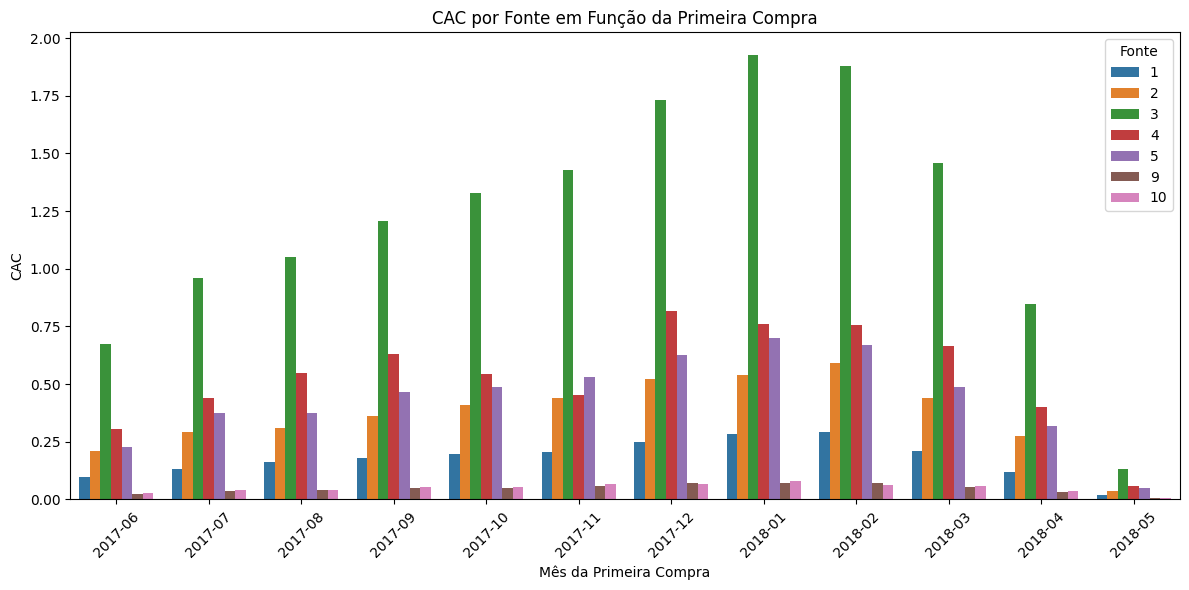

In [59]:
# Grafico CAC
report_['first_orders_month'] = report_['first_orders_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=report_, x='first_orders_month', y='cac', hue='source_id', ci=None)

plt.title('CAC por Fonte em Função da Primeira Compra')
plt.xlabel('Mês da Primeira Compra')
plt.ylabel('CAC')
plt.xticks(rotation=45)

plt.legend(title='Fonte')
plt.tight_layout()
plt.show()

In [60]:
#Série com a média do ROMI acumulado ao longo do tempo para cada período:
output = report_.pivot_table(
    index= 'first_orders_month',
    columns = 'age', 
    values= 'romi', 
    aggfunc= 'mean')
output.cumsum(axis=1).mean(axis=0)

age
0       2897.915583
1       5294.650304
2       7803.259454
3      12210.450030
4      16997.339131
5      23225.046949
6      31263.825604
7      41481.036715
8      56339.418775
9      70283.388659
10     93207.240962
11    189985.209092
dtype: float64

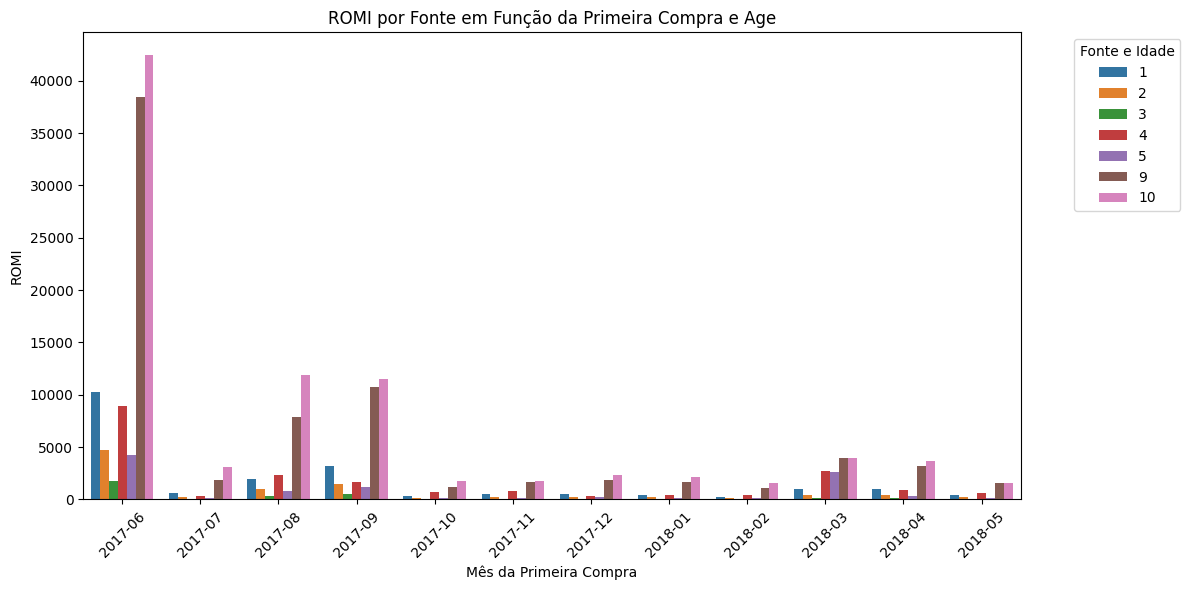

In [61]:
report_['first_orders_month'] = report_['first_orders_month'].astype(str)
plt.figure(figsize=(12, 6))
sns.barplot(data=report_, x='first_orders_month', y='romi', hue='source_id', ci=None)
plt.title('ROMI por Fonte em Função da Primeira Compra e Age')
plt.xlabel('Mês da Primeira Compra')
plt.ylabel('ROMI')
plt.xticks(rotation=45)

plt.legend(title='Fonte e Idade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Resposta do aluno:
Foi adicionado a coluna 'cac' com o custo de aquisição para cada período, Sobre o ROMI, segundo os dados existe uma cobertura de custo no segundo mês.

In [62]:
# Verificando o custo de captação de clientes por cada origem:

costs_df.rename(columns={'source_id': 'Source Id'}, inplace=True)

In [63]:
# Verificando os indicadores de anúncios que tiveram maiores custos:
g_source = costs_df.groupby('Source Id')['costs'].sum().sort_values(ascending=False)

print(g_source)

Source Id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


In [64]:
#Verificando as campanhas que tiveram maiores retornos(em cada plataforma)
grouped_data = df_visits.groupby(['Source Id', 'Device'])['Revenue'].sum().reset_index()

# Separando os resultados para 'desktop' e 'touch'
desktop = grouped_data[grouped_data['Device'] == 'desktop'].sort_values(by='Revenue', ascending=False)
touch = grouped_data[grouped_data['Device'] != 'desktop'].sort_values(by='Revenue', ascending=False)

print(desktop)
print(touch)

    Source Id   Device       Revenue
2           2  desktop  2.473935e+06
0           1  desktop  2.095264e+06
8           5  desktop  1.155947e+06
6           4  desktop  4.107841e+05
4           3  desktop  2.707022e+05
11          9  desktop  3.044148e+04
13         10  desktop  1.081877e+04
10          7  desktop  1.220000e+00
    Source Id Device    Revenue
1           1  touch  202935.76
3           2  touch  164254.40
7           4  touch   85906.06
5           3  touch   25985.74
9           5  touch   25530.17
12          9  touch    5900.77
14         10  touch    3800.46


In [65]:
# Comparativo custo Total do anúncio x receita Total:
merged_date = pd.merge(g_source, grouped_data, on='Source Id', how='inner')

desktop_cost = merged_date[merged_date['Device'] == 'desktop']
touch_cost = merged_date[merged_date['Device'] != 'desktop']
print(desktop_cost)
print(touch_cost)

    Source Id      costs   Device       Revenue
0           3  141321.63  desktop  2.707022e+05
2           4   61073.60  desktop  4.107841e+05
4           5   51757.10  desktop  1.155947e+06
6           2   42806.04  desktop  2.473935e+06
8           1   20833.27  desktop  2.095264e+06
10         10    5822.49  desktop  1.081877e+04
12          9    5517.49  desktop  3.044148e+04
    Source Id      costs Device    Revenue
1           3  141321.63  touch   25985.74
3           4   61073.60  touch   85906.06
5           5   51757.10  touch   25530.17
7           2   42806.04  touch  164254.40
9           1   20833.27  touch  202935.76
11         10    5822.49  touch    3800.46
13          9    5517.49  touch    5900.77


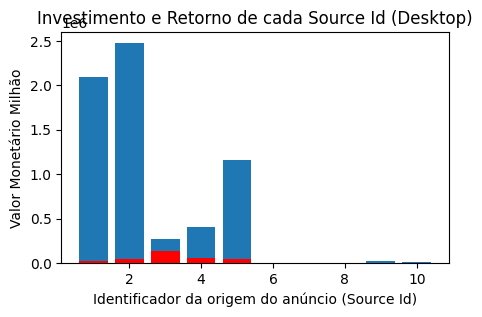

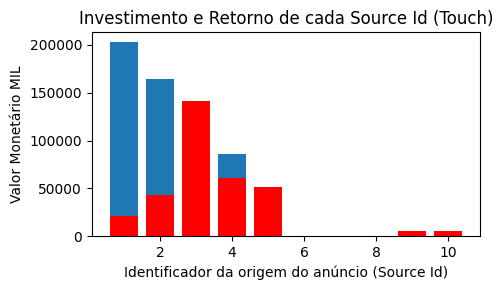

In [66]:
# Comparativo Desktop e Touch (Grafico):
plt.figure(figsize=(5,3))
plt.bar(desktop_cost['Source Id'], desktop_cost['Revenue'], align='center') # Receita
plt.bar(desktop_cost['Source Id'], desktop_cost['costs'], align='center', color='red') #  Investimento
plt.title('Investimento e Retorno de cada Source Id (Desktop)')
plt.xlabel('Identificador da origem do anúncio (Source Id)')
plt.ylabel('Valor Monetário Milhão')

plt.figure(figsize=(5,3))
plt.bar(touch_cost['Source Id'], touch_cost['Revenue'], align='center') # Receita
plt.bar(touch_cost['Source Id'], touch_cost['costs'], align='center', color='red') #  Investimento
plt.title('Investimento e Retorno de cada Source Id (Touch)')
plt.xlabel('Identificador da origem do anúncio (Source Id)')
plt.ylabel('Valor Monetário MIL')

plt.tight_layout()
plt.show()

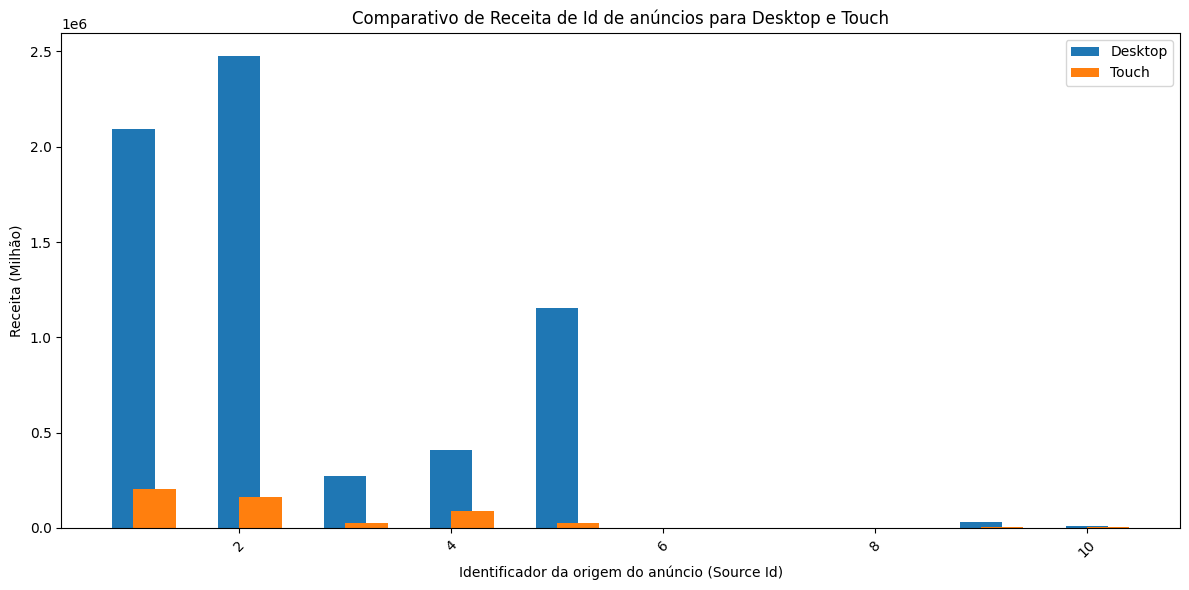

In [67]:
plt.figure(figsize=(12, 6))
plt.bar(desktop['Source Id'], desktop['Revenue'], width=0.4, label='Desktop', align='center')

plt.bar(touch['Source Id'], touch['Revenue'], width=0.4, label='Touch', align='edge')

plt.title('Comparativo de Receita de Id de anúncios para Desktop e Touch')
plt.xlabel('Identificador da origem do anúncio (Source Id)')
plt.ylabel('Receita (Milhão)')
plt.legend()

plt.xticks(rotation=45) 
plt.tight_layout()   
plt.show()

##### Resposta do Aluno:
Segundo os dados, temos muito mais retorno nos anúncios para desktop. temos que verificar se  há algum problema de layout para dispositivo móvel, isso pode  acarretar nos clientes optando realizar as compras via desktop, contudo precisamos dar mais atenção ao público que usa desktop, ou seja podemos realizar um investimento maior nos anúncios para essa plataforma, alguns anúncios performaram mais que outros, como por exemplo o 'Source Id' '1' e '2', onde tivemos mais receita, contudo é necessário estudar tambem os 'Source Ids' 4 e 9. Alguns anuncios para touch são totalmente inviáveis (conforme apresentado no grafico comparativo de investimento x retorno).